In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
X, y = digits.data, digits.target

#paramaters for knn
n_classes = len(np.unique(y))
n_neighbors = 3
random_state = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42)


Using dimentionality reduction methods

In [3]:
#creating a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import (PCA, IncrementalPCA, KernelPCA)

#PCA
pca = make_pipeline(StandardScaler(), 
PCA(n_components=2, random_state=random_state))

#Incremental PCA - keeps most significant vectors to project the data
inc_pca = make_pipeline(StandardScaler(), IncrementalPCA(n_components=2))

#Kernel PCA - Used to perform projections for non-linear variables
kpca = make_pipeline(StandardScaler(), KernelPCA(kernel='cosine',
n_components=2, #no of components
gamma=None, #kernel coefficient for sigmoid, rbf and poly kernels
fit_inverse_transform=True,
random_state=random_state,
n_jobs = 1)) #The number of parallel jobs to run. -1 means using all processors.

types of kernels - 'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'

In [4]:
#Sparse PCA- extracts PCA and SVD by linking PCA and SVD

from sklearn.decomposition import (SparsePCA, TruncatedSVD)

sparsepca = make_pipeline(StandardScaler(), 
SparsePCA(n_components=2, #no of sparse atoms to extract
alpha = 0.001, #sparsity controlling parameter. Higher values lead to sparser components.
random_state = random_state,
n_jobs = -1) #no of parallel jobs to run. -1 means using all processors
)

#truncated SVD
svd = make_pipeline(StandardScaler(),
TruncatedSVD(n_components=2, #Desired dimensionality of output data.
#must be strictly less then no of features
algorithm = 'randomized',
random_state = random_state,
n_iter=5))

### Singular Value Decomposition (SVD)

SVD can be applied even on rectangular matrices; whereas, eigenvalues are defined only for square matrices. The equivalent of eigenvalues obtained through the SVD method are called singular values, and vectors obtained equivalent to eigenvectors are known as singular vectors. However, as they are rectangular in nature, we need to have left singular vectors and right singular vectors respectively for their dimensions.

### Gaussian and sparse Random Projection

In [6]:
from sklearn.random_projection import (GaussianRandomProjection, 
SparseRandomProjection)

# Gaussian Random Projection - large dimension data are projected in a 2D space with a random matrix
grp = make_pipeline(StandardScaler(),
GaussianRandomProjection(n_components=2,
eps = 0.5, #parameter to control the quality of the embedding.
#smaller values lead to better embedding
random_state = random_state)) 

#Sparse Random Projection
SRP = make_pipeline(StandardScaler(),
SparseRandomProjection(n_components=2,
density= 'auto', # Ratio in the range (0, 1] of non-zero component in the random projection matrix.
                 # If density = ‘auto’, the value is set to the minimum density
eps = 0.5, #parameter to control quality of embedding
random_state = random_state,
dense_output = False
))

In [7]:
#Independent Component Analysis - Used to linearly seperate mixed data
from sklearn.decomposition import FastICA
ica = make_pipeline(StandardScaler(),
FastICA(n_components=2,
algorithm = 'parallel',
whiten = True, #A whitening transformation is a decorrelation transformation that transforms 
               # a set of random variables into a set of new random variables with
               #  identity covariance (uncorrelated with unit variances).
max_iter = 100, 
random_state = random_state))

In [15]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = make_pipeline(StandardScaler(),
LinearDiscriminantAnalysis(n_components=2))

In [13]:
#evaluating the methods 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

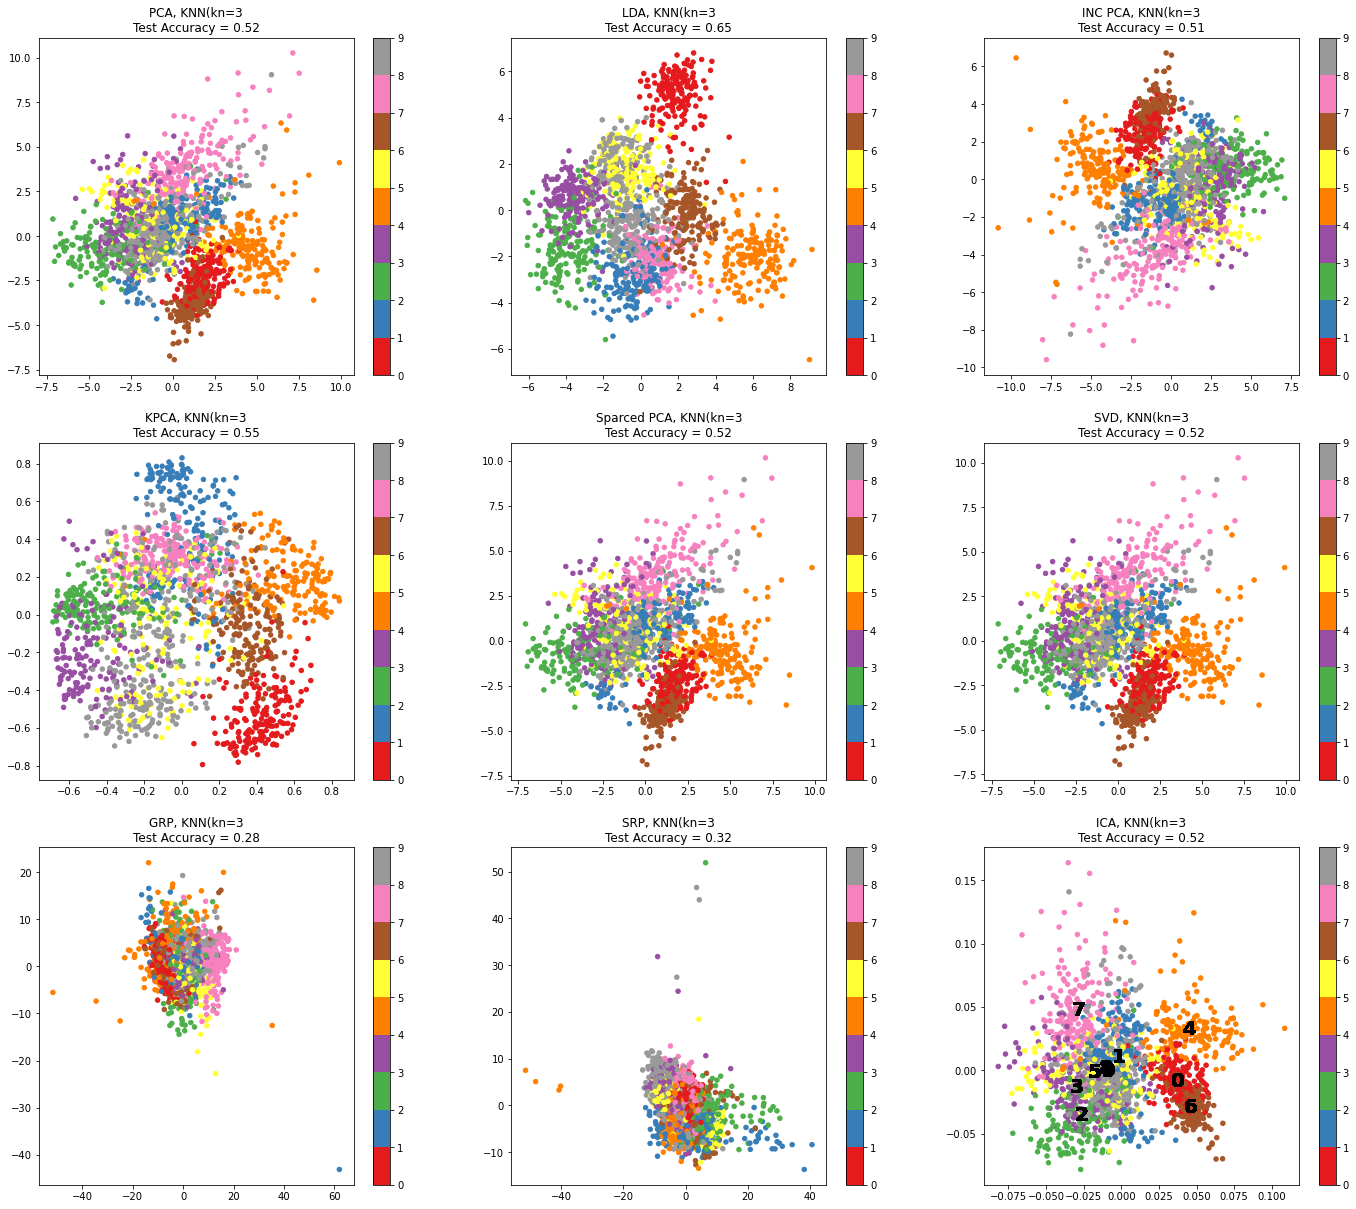

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Make a list of the methods to be compared
dim_reduction_methods = {"PCA": pca,
'LDA': lda,
'INC PCA': inc_pca,
'KPCA': kpca,
'Sparced PCA': sparsepca,
'SVD': svd,
'GRP': grp,
'SRP': SRP,
'ICA': ica
}

plt.figure(figsize=(24, 36))

for j, (name,model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(5, 3, j+1, aspect='auto')
    model.fit(X_train, y_train)
    knn.fit(model.transform(X_train), y_train)
    acc_knn = knn.score(model.transform(X_test ), y_test)
    X_embedded = model.transform(X)
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1,1))), axis=1))

    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
    plt.title("{}, KNN(kn={}\nTest Accuracy = {:.2f}".format(name,
    n_neighbors, acc_knn))
    plt.colorbar()

for i, number in enumerate(y_test):
    plt.annotate(number,
    df.loc[df[2] == number, [0,1]].mean(),
    horizontalalignment='center',
    verticalalignment = 'center',
    weight='bold',
    size='20')
plt.show()